# Extracting, Inspecting and Cleaning the data

## Extract the dataset

After downloading the dataset from the project site: http://www.robots.ox.ac.uk/~vgg/data/fgvc-aircraft/ Extract the fgvc-aircraft-2013b.tar.gz file locally and Move the extracted data directory to your processing directory.

The dataset size is 2.75 GB

The data folder contains 'images' folder that contains all the labeled images.
The data folder also contains the labels files labeld by classification type. (i.e. classification by Aircraft families, manufacturers and variants)

##### Count all the avaliable images in the data=>images folder

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
from PIL import Image
import os

# check the data folder content.
labels_path, root_dirs, label_files = next(os.walk("data"))
images_path, dirs, files = next(os.walk("data\\images"))
print('data folder content')
for label_file in label_files:
    print('label file: {0}'.format(label_file))

print('*********************************')
file_count = print("Total count of images:{0}".format(len(files)))
file_count = print("Total label files :{0}".format(len(label_files)))

data folder content
label file: families.txt
label file: images_box.txt
label file: images_family_test.txt
label file: images_family_train.txt
label file: images_family_trainval.txt
label file: images_family_val.txt
label file: images_manufacturer_test.txt
label file: images_manufacturer_train.txt
label file: images_manufacturer_trainval.txt
label file: images_manufacturer_val.txt
label file: images_test.txt
label file: images_train.txt
label file: images_val.txt
label file: images_variant_test.txt
label file: images_variant_train.txt
label file: images_variant_trainval.txt
label file: images_variant_val.txt
label file: manufacturers.txt
label file: variants.txt
*********************************
Total count of images:10000
Total label files :19


## Inspect a random image from the dataset and check the format, size and mode

image format:JPEG (ISO 10918)
image size:(800, 413)
image mode:RGB


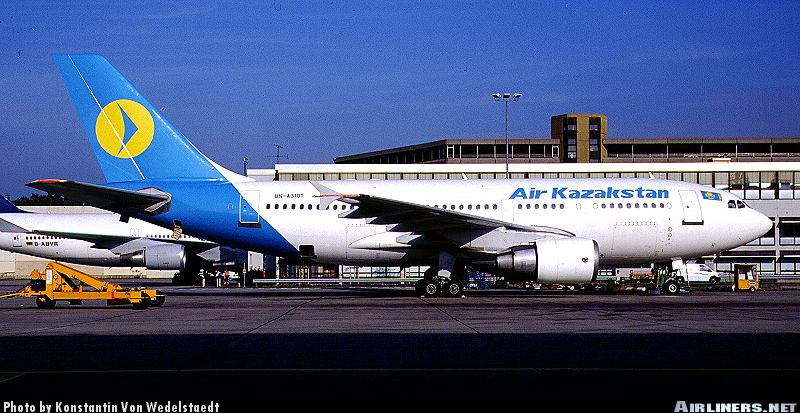

In [5]:
# inspect a random image
image = Image.open(images_path+'\\0062719.jpg')
print('image format:{0}'.format(image.format_description))
print('image size:{0}'.format(image.size))
print('image mode:{0}'.format(image.mode))
image

image format:JPEG (ISO 10918)
image size:(850, 604)
image mode:RGB


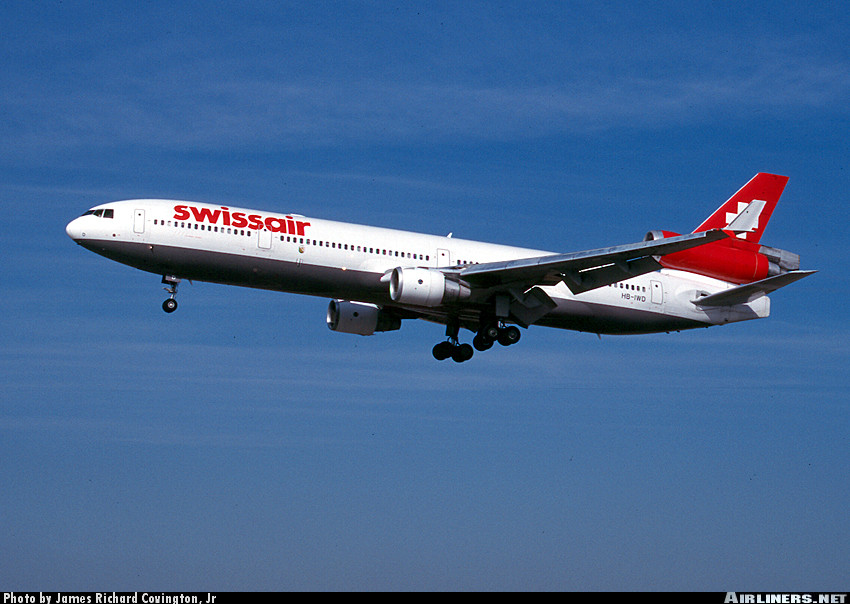

In [6]:
# Inspect another random image
image = Image.open('data\\images\\0061399.jpg')
print('image format:{0}'.format(image.format_description))
print('image size:{0}'.format(image.size))
print('image mode:{0}'.format(image.mode))
image

## Define a function to crop all the dataset images to remove the Airliners.Net buttom banner

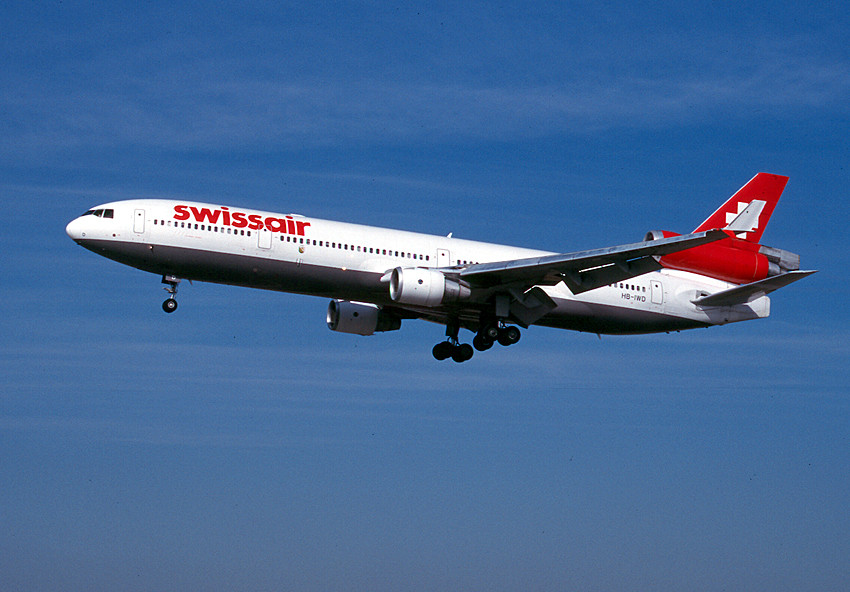

In [71]:
# function to crops the banner of a PIL image file and returns the cropped image
def cropBanner(image, bannerHeight=12):
    crop_height = image.size[1] - bannerHeight
    box = (0, 0, image.size[0], crop_height)
    cropped_image = image.crop(box)
    return cropped_image

# crop the previous image and check the crop result
cropBanner(image)

## Iterate through all the images, remove the banner and resave them to a new directory

In [84]:
# create new directory for banner-removed images
clean_images_directory ='.\data\clean_images'
if not os.path.exists(clean_images_directory):
    os.mkdir(clean_images_directory)

# iterate through all the images, crop them and move them to the clean_images_directory
for img_file in glob.glob('data\images\*.jpg'):
    image = Image.open(img_file)
    croppedImg = cropBanner(image)
    cropped_img_path = os.path.join(clean_images_directory,os.path.basename(img_file))
    croppedImg.save(cropped_img_path)

#### Verify the process was complete

In [85]:
# verify the process finished successfully
images_path, dirs, files = next(os.walk(clean_images_directory))
file_count = print("Total count of images:{0}".format(len(files)))

Total count of images:10000
